PREGUNTA 1

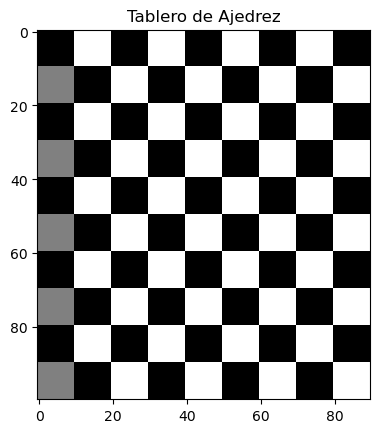

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

colores = []
tamaño = 10
filas, conlumnas = 10, 9


tablero = np.ones((filas*tamaño, conlumnas*tamaño), dtype=np.uint8) * 255
for i in range(filas):
    for j in range(conlumnas):  
        if ( i + j ) % 2 == 0:
            tablero [i*tamaño:(i+1)*tamaño, j*tamaño:(j+1)*tamaño] = 0
 

for i in range(filas):
    if ( i + 1 ) % 2 == 0:
        tablero [i*tamaño:(i+1) * tamaño,  0:tamaño] = 128


plt.imshow(tablero, cmap='gray')
plt.title('Tablero de Ajedrez')
plt.show()


PREGUNTA 2

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

filas, conlumnas = 7,6
square_size = 10

colors = [(255, 255, 255), (0, 128, 0), (255, 0, 0), (128, 0, 128), 
          (0, 0, 255), (0, 165, 255), (0, 255, 255)]  

color_pattern = np.zeros((filas*square_size, conlumnas*square_size), dtype=np.uint8)

for i in range(filas):
    for j in range(conlumnas):
        color = colors[(i - j) % len(colors)]
        color_pattern[i*square_size:(i+1)*square_size, j*conlumnas:(j+1)*square_size] = color


plt.imshow(cv2.cvtColor(color_pattern, cv2.COLOR_BGR2RGB))
plt.title("Ejercicio 2 ")
plt.show()

ValueError: could not broadcast input array from shape (3,) into shape (10,10)

PREGUNTA 3

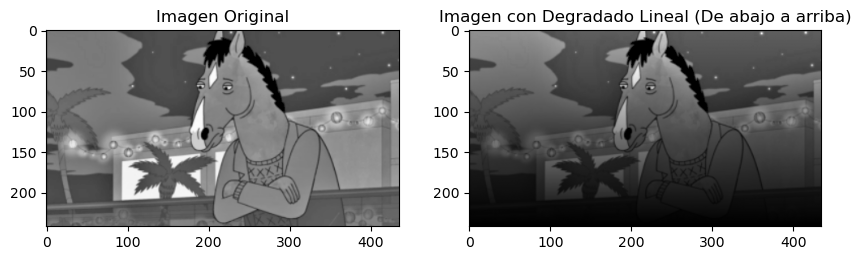

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imagen1.png',0)
degradado = np.linspace(1, 0, imagen.shape[0])

mascara = np.tile(degradado, (imagen.shape[1], 1)).T

imagen_degradada = imagen * mascara

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(imagen_degradada, cmap='gray')
plt.title('Imagen con Degradado Lineal (De abajo a arriba)')

plt.show()

PREGUNTA 4

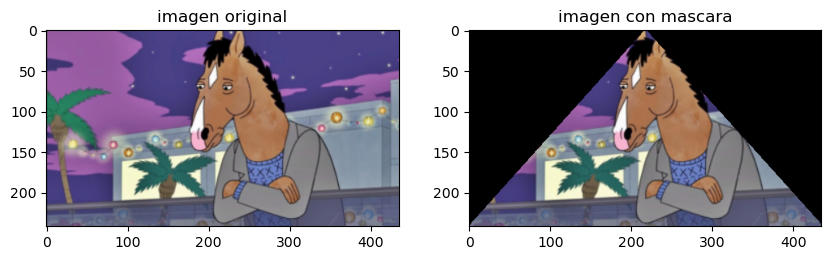

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('imagen1.png')

alto, base = img.shape[:2]

mascara = np.zeros((alto, base), dtype=np.uint8)
area = np.array([[(0, alto),(base, alto), (base // 2,0)]], dtype=np.int32)
tamaño = 150

cv2.fillPoly(mascara, [area], tamaño, 255)
img_mascara = cv2.bitwise_and(img, img, mask=mascara)

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imagen original')


plt.subplot(122)
plt.imshow(cv2.cvtColor(img_mascara,cv2.COLOR_BGR2RGB))
plt.title('imagen con mascara')
plt.show()

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
def puntoInteres(imagen):
 
    #punto de interes
    plt.imshow(imagen[150:200,120:200,:])
    plt.show()
    #guardando de imagen
    img_cortada =imagen[50:65,20:35,:]
    plt.imsave('imgex.png',img_cortada)
   
 
def histogramas(imagen):
    seccionada = imagen
    color = ('r','g','b')
    for canal,col in enumerate(color):
        histograma = cv2.calcHist([seccionada*255],[canal],None,[256],[0,256])
        plt.plot(histograma,color=col)
        plt.xlim([0,256])
    plt.title('Histograma por canales')
    plt.show()
 
def solarizar(imagen, umbral):
    img_solarizada = np.where(imagen<umbral,imagen,255-imagen)
    return img_solarizada
 
def posterizar(imagen,nivel):
    factor = 255/nivel
    img_post = np.round((imagen/factor)*factor)
    return img_post.astype(np.uint8)
 
def dos_picos(imagen):
    hist = cv2.calcHist([imagen],[0],None,[256],[0,256])
    pico = np.array(hist)
    pico = pico.flatten()
    pico_dif = np.diff(pico)
    primer_pico = np.argmax(pico_dif[:128])
    segundo_pico = np.argmax(pico_dif[128:])+128
    umbral_2picos = int((primer_pico+segundo_pico)/2)
    return umbral_2picos
 
def mezclaDeTecnicas(imagen):
    umb_adap=cv2.adaptiveThreshold(imagen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    imgCol = cv2.applyColorMap(umb_adap,cv2.COLORMAP_INFERNO)
    return imgCol





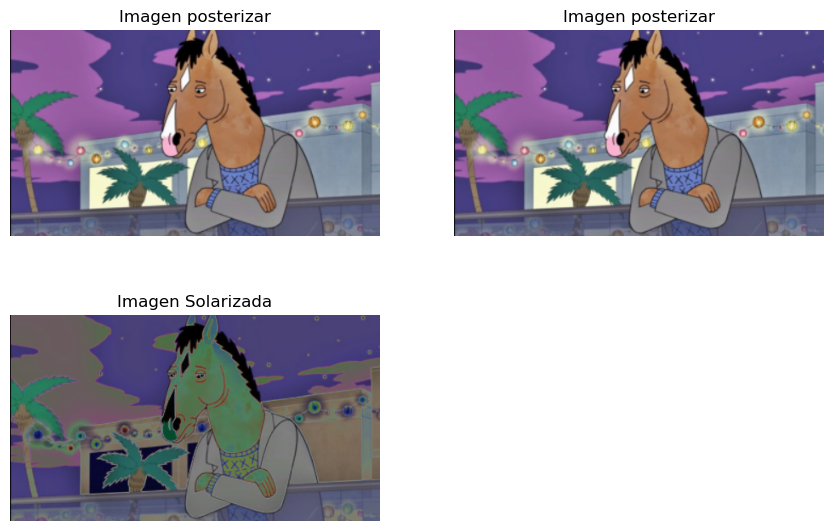

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imagen = cv2.imread('imagen1.png')

img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


img_posterizada = posterizar(img_rgb, 4)

plt.figure(figsize=(10.5, 10.5))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen posterizar')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(img_posterizada)
plt.title('Imagen posterizar')
plt.axis('off')

plt.show()
